In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [88]:
start= datetime.datetime(2015, 1, 1)  # The start of the year for example
end= datetime.datetime(2020, 7, 30)

In [119]:
ticker_1 = "mts.ax"
ticker_2 = "wow.ax"

In [120]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [121]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-25,3.04,3.00,3.01,3.03,5275966.0,3.03
2019-09-26,3.02,2.96,3.02,2.97,3441557.0,2.97
2019-09-27,3.05,2.98,2.98,3.00,4443670.0,3.00
2019-09-30,3.02,2.98,3.00,2.99,7389909.0,2.99
2019-10-01,3.00,2.97,2.98,2.99,4592902.0,2.99


In [122]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-25,38.040001,37.549999,37.770000,37.549999,3274014.0,37.549999
2019-09-26,37.959999,37.230000,37.869999,37.380001,2649118.0,37.380001
2019-09-27,37.730000,37.250000,37.529999,37.540001,3081577.0,37.540001
2019-09-30,37.750000,37.279999,37.500000,37.279999,2399949.0,37.279999
2019-10-01,37.599998,37.009998,37.209999,37.590000,2360420.0,37.590000


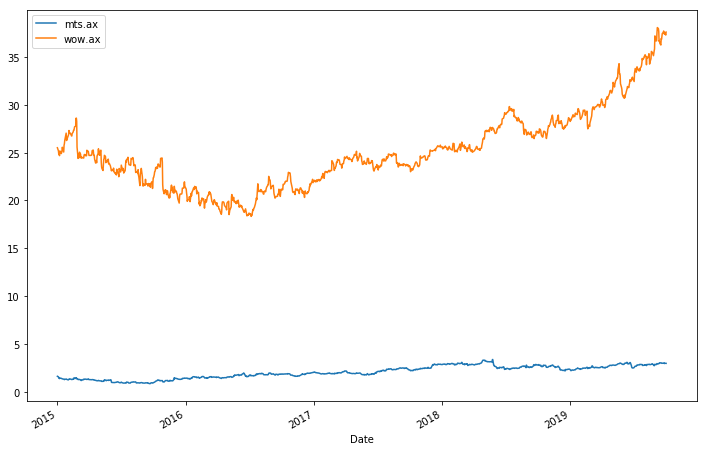

In [123]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [124]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

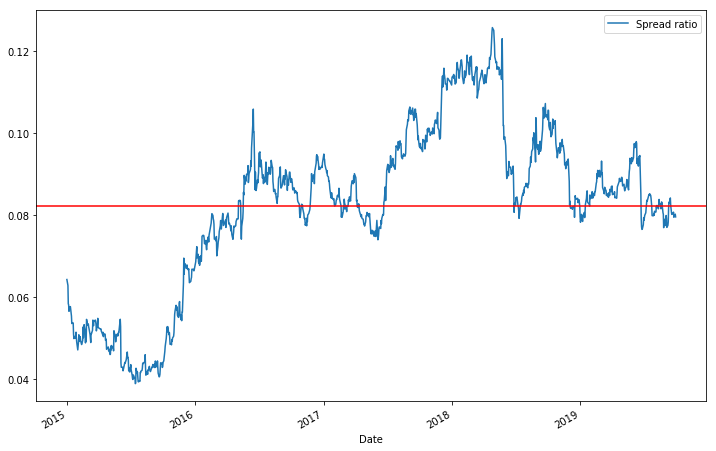

In [125]:
spread_ratio.plot(label='Spread ratio',figsize=(12,8))
plt.axhline(spread_ratio.mean(),c='r')
plt.legend();

In [126]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

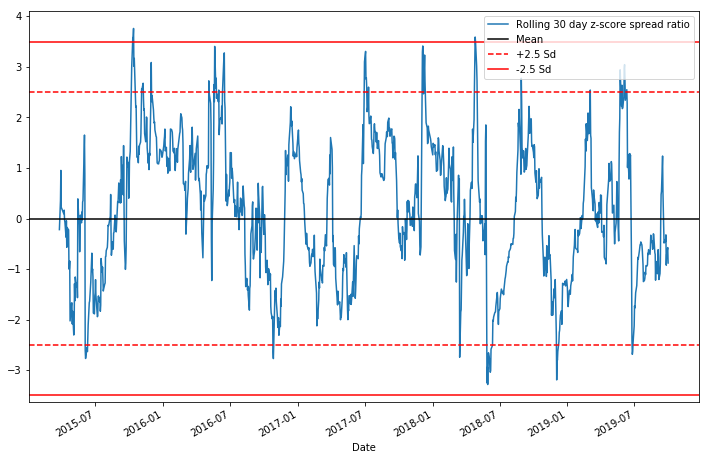

In [127]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(60).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(60).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.5, color='red', linestyle='--')
plt.axhline(3.5, color='red', linestyle='-')
plt.axhline(-3.5, color='red', linestyle='-')
plt.axhline(-2.5, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+2.5 Sd', '-2.5 Sd']);

In [128]:
from statsmodels.tsa.stattools import coint

In [129]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [130]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [131]:
print('----------------------------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------------------------------------
T-stat for the pair mts.ax VS wow.ax: -1.7807710875849387
Alpha value for the T-stat:  0.6390143871368033
--------------------------------------
T-stat 99%:  -3.9055822280627925
T-stat 95%:  -3.341222240715307
T-stat 90%:  -3.0479832762525816


In [132]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.65671425],
       [0.65671425, 1.        ]])

In [118]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[15.16220583, 21.12809184],
       [21.12809184, 87.55154812]])

# Differencing method of spread; GARCH volatility method of spread and final use log returns minus average log returns of spread over GARCH - to be done next

In [ ]:
zscore_30_1_ratio[-20:]

In [ ]:
statsmodels.tsa.stattools.adfuller(spread_ratio, maxlag=None, regression='c', autolag='t-stat', store=False, regresults=False)